In [28]:
import pandas as pd
import numpy as np

In [29]:
def merge_data(sales_data, campaign_data, weather_data, economic_data):
    sales_data['date'] = pd.to_datetime(sales_data['date'])
    campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'])
    campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'])
    weather_data['date'] = pd.to_datetime(weather_data['date'])
    economic_data['date'] = pd.to_datetime(economic_data['date'])

    sales_data = sales_data.merge(weather_data, on='date', how='left')
    sales_data = sales_data.merge(economic_data, on='date', how='left')
    sales_data = sales_data.merge(campaign_data, on='product_id', how='left')

    sales_data['is_campaign'] = ((sales_data['date'] >= sales_data['start_date']) & (sales_data['date'] <= sales_data['end_date'])).astype(int)
    sales_data['discount_rate'] = np.where(sales_data['is_campaign'] == 0, 0, sales_data['discount_rate'])
    sales_data.drop(columns=['start_date', 'end_date', 'campaign_type'], inplace=True)

    sales_data = pd.get_dummies(sales_data, columns=['precipitation'], prefix='precipitation',dtype=int)
    

    sales_data.fillna(method='ffill', inplace=True)

    return sales_data


In [30]:
def sliding_window(data, window_size, product_id):
    result = []
    data = data[data['product_id'] == product_id]
    print(len(data))
    if len(data) > 0:  # Check if product_id exists in the DataFrame
        for i in range(len(data) - window_size + 1):
            window = {'date': data['date'].iloc[i + window_size - 1]}
            for j in range(window_size-1):
                window[f"sales_quantity_{j+1}_day_before"] = data['sales_quantity'].iloc[i+j]
            result.append(window)

        result = pd.DataFrame(result)
        result = result.merge(data, on='date', how='left')
    else:
        print(f"No data found for product_id: {product_id}")
        result = pd.DataFrame()  # Return an empty DataFrame if product_id does not exist

    return result


In [31]:
# Verileri yükleme
sales_data = pd.read_csv('data/sales_data.csv')
campaign_data = pd.read_csv('data/campaign_data.csv')
weather_data = pd.read_csv('data/weather_data.csv')
economic_data = pd.read_csv('data/economic_data.csv')

merged_data = merge_data(sales_data, campaign_data, weather_data, economic_data)


C:\Users\omers\AppData\Local\Temp\ipykernel_12064\2240842717.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data.fillna(method='ffill', inplace=True)


In [32]:
n_windowed_df = sliding_window(merged_data, window_size=3,product_id=3)

2196


In [33]:
n_windowed_df

,date,sales_quantity_1_day_before,sales_quantity_2_day_before,product_id,sales_quantity,average_temperature,inflation_rate,unemployment_rate,discount_rate,is_campaign,precipitation_Cloudy,precipitation_Rainy,precipitation_Sunny
0,2022-01-02,24,24,3,63,7.769462,16.410246,10.232272,0.0,0,0,0,1
1,2022-01-02,24,24,3,63,7.769462,16.410246,10.232272,0.0,0,0,0,1
2,2022-01-02,24,63,3,63,7.769462,16.410246,10.232272,0.0,0,0,0,1
3,2022-01-02,24,63,3,63,7.769462,16.410246,10.232272,0.0,0,0,0,1
4,2022-01-03,63,63,3,35,27.470301,16.410246,10.232272,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,2025-01-01,81,62,3,62,6.486927,15.665463,10.358618,0.0,0,0,1,0
4384,2025-01-02,62,62,3,36,21.467272,15.665463,10.358618,0.0,0,0,1,0
4385,2025-01-02,62,62,3,36,21.467272,15.665463,10.358618,0.0,0,0,1,0
4386,2025-01-02,62,36,3,36,21.467272,15.665463,10.358618,0.0,0,0,1,0


In [34]:
merged_data

,product_id,date,sales_quantity,average_temperature,inflation_rate,unemployment_rate,discount_rate,is_campaign,precipitation_Cloudy,precipitation_Rainy,precipitation_Sunny
0,1,2022-01-01,65,14.930308,16.410246,10.232272,0.0,0,0,0,1
1,1,2022-01-02,69,7.769462,16.410246,10.232272,0.0,0,0,0,1
2,1,2022-01-03,40,27.470301,16.410246,10.232272,0.0,0,1,0,0
3,1,2022-01-04,57,9.631890,16.410246,10.232272,0.0,0,1,0,0
4,1,2022-01-05,32,19.755798,16.410246,10.232272,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
189949,100,2025-01-01,50,6.486927,15.665463,10.358618,0.0,0,0,1,0
189950,100,2025-01-02,42,21.467272,15.665463,10.358618,0.0,0,0,1,0
189951,100,2025-01-02,42,21.467272,15.665463,10.358618,0.0,0,0,1,0
189952,100,2025-01-02,42,21.467272,15.665463,10.358618,0.0,0,0,1,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


def demand_forecast_and_stock_optimization(merged_df, window_size, product_id):
    
    n_windowed_df = sliding_window(merged_df, window_size=window_size,product_id=product_id)

    n_windowed_df = n_windowed_df[n_windowed_df['product_id'] == product_id]

    n_windowed_df.drop_duplicates(inplace=True)
    n_windowed_df['average_temperature'] = n_windowed_df['average_temperature'].astype(int)
    n_windowed_df['inflation_rate'] = n_windowed_df['inflation_rate'].astype(int)
    n_windowed_df['unemployment_rate'] = n_windowed_df['unemployment_rate'].astype(int)

    X = n_windowed_df.drop(columns=['product_id', 'date', 'sales_quantity'])
    
    print(X.iloc[0])
    
    
    y = n_windowed_df['sales_quantity']
    
    print(y.iloc[0])

    # Veriyi eğitim ve test olarak ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    
    demand = y_pred.mean()
    ordering_cost = 50
    holding_cost = 2
    eoq = np.sqrt((2 * demand * ordering_cost) / holding_cost)
    print(f"Economic Order Quantity (EOQ): {eoq}")

    return model, eoq, sales_data



# Modeli çalıştırma
product_id = 1
merged_data = merge_data(sales_data, campaign_data, weather_data, economic_data)

# demand_model_resp, optimal_stock_resp,sales_data_resp = demand_forecast_and_stock_optimization(merged_data, window_size=3, product_id=3)

window_size = 8
print(f"Window Size: {window_size}")
demand_model, optimal_stock,sales_data = demand_forecast_and_stock_optimization(merged_data, window_size, product_id)
print("\n")

import joblib 

joblib.dump(demand_model, 'demand_model.pkl')





C:\Users\omers\AppData\Local\Temp\ipykernel_12064\2240842717.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data.fillna(method='ffill', inplace=True)


Window Size: 8
1098
sales_quantity_1_day_before    65.0
sales_quantity_2_day_before    69.0
sales_quantity_3_day_before    40.0
sales_quantity_4_day_before    57.0
sales_quantity_5_day_before    32.0
sales_quantity_6_day_before    40.0
sales_quantity_7_day_before    98.0
average_temperature            14.0
inflation_rate                 16.0
unemployment_rate              10.0
discount_rate                   0.0
is_campaign                     0.0
precipitation_Cloudy            0.0
precipitation_Rainy             1.0
precipitation_Sunny             0.0
Name: 0, dtype: float64
17
Mean Absolute Error: 15.988721461187213
Economic Order Quantity (EOQ): 50.053510179392404




['demand_model.pkl']

In [36]:
demand_model_pkl = joblib.load('demand_model.pkl') 
  
predict_data = [[65,69,40,57,32,40,98,14,16,10,0,0,1,0,0]]

# Use the loaded model to make predictions 
demand_model_pkl.predict(predict_data)[0]

last_n_days_sales = merged_data[merged_data['product_id'] == product_id].tail(window_size)
print(last_n_days_sales)




      product_id       date  sales_quantity  average_temperature  \
1090           1 2024-12-26              24            22.611938   
1091           1 2024-12-27              47            17.976574   
1092           1 2024-12-28              31            10.933407   
1093           1 2024-12-29              62            25.035814   
1094           1 2024-12-30              57            24.871042   
1095           1 2024-12-31              71            23.510594   
1096           1 2025-01-01              57             6.486927   
1097           1 2025-01-02              46            21.467272   

      inflation_rate  unemployment_rate  discount_rate  is_campaign  \
1090       15.444172          11.877906            0.0            0   
1091       15.444172          11.877906            0.0            0   
1092       15.444172          11.877906            0.0            0   
1093       15.444172          11.877906            0.0            0   
1094       15.444172          11

c:\Users\omers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [37]:
all_current_stock_data = pd.read_csv('data/current_stock_data.csv')

def get_product_stock_by_id(all_stock, product_id):
    current_stock_data = all_stock[all_stock['product_id'] == product_id]
    current_stock = current_stock_data['current_stock'].iloc[0]
    return current_stock

current_stock = get_product_stock_by_id(all_current_stock_data, product_id)

In [38]:

def predict_next_n_days(next_n_day, demand_model_pkl):
    temp_array = []
    day_sales_predictions = []

    last_n_days_sales = merged_data[merged_data['product_id'] == product_id].tail(window_size)

    last_n_days_sales.iloc[-1]['average_temperature']
    last_day_avg_temp = last_n_days_sales['average_temperature'].iloc[-1]
    last_day_inflation_rate = int(last_n_days_sales['inflation_rate'].iloc[-1])
    last_day_unemployment_rate = int(last_n_days_sales['unemployment_rate'].iloc[-1])
    last_day_campaign = int(last_n_days_sales['is_campaign'].iloc[-1])
    last_day_discount_rate = int(last_n_days_sales['discount_rate'].iloc[-1])
    last_day_is_cloudy = int(last_n_days_sales['precipitation_Cloudy'].iloc[-1])
    last_day_is_rainy = int(last_n_days_sales['precipitation_Rainy'].iloc[-1])
    last_day_is_sunny = int(last_n_days_sales['precipitation_Sunny'].iloc[-1])

    for x in range (0,window_size - 1):
        day_sales_predictions.append(last_n_days_sales['sales_quantity'].iloc[x])

    temp_array.append(last_day_avg_temp)
    temp_array.append(last_day_inflation_rate)
    temp_array.append(last_day_unemployment_rate)
    temp_array.append(last_day_discount_rate)
    temp_array.append(last_day_campaign)
    temp_array.append(last_day_is_cloudy)
    temp_array.append(last_day_is_rainy)
    temp_array.append(last_day_is_sunny)

    predictions = []

    for _ in range(next_n_day):
        predict_data = [day_sales_predictions + temp_array]
        print(predict_data)
        prediction = int(demand_model_pkl.predict(predict_data)[0])
        print(prediction)
        predictions.append(prediction)
        day_sales_predictions.pop(0)
        day_sales_predictions.append(prediction)
        print(day_sales_predictions)
    
    return predictions
    

prediction_for_next_n_days = predict_next_n_days(5, demand_model_pkl)

[[24, 47, 31, 62, 57, 71, 57, 21.467272299197894, 15, 10, 0, 0, 0, 1, 0]]
45
[47, 31, 62, 57, 71, 57, 45]
[[47, 31, 62, 57, 71, 57, 45, 21.467272299197894, 15, 10, 0, 0, 0, 1, 0]]
41
[31, 62, 57, 71, 57, 45, 41]
[[31, 62, 57, 71, 57, 45, 41, 21.467272299197894, 15, 10, 0, 0, 0, 1, 0]]
49
[62, 57, 71, 57, 45, 41, 49]
[[62, 57, 71, 57, 45, 41, 49, 21.467272299197894, 15, 10, 0, 0, 0, 1, 0]]
53
[57, 71, 57, 45, 41, 49, 53]
[[57, 71, 57, 45, 41, 49, 53, 21.467272299197894, 15, 10, 0, 0, 0, 1, 0]]
50
[71, 57, 45, 41, 49, 53, 50]


c:\Users\omers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\omers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\omers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\omers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\omers\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid fea

In [39]:
def check_if_stock_is_enough(stock, prediction_for_next_n_days, optimal_stock):
    demand = sum(prediction_for_next_n_days)
    print(stock-demand)
    if stock >= demand:
        return "Stock is enough"
    elif stock < demand and stock >= optimal_stock:
        return "Stock is not enough. But it is more than Economic Order Quantity. Please order more products"
    else:
        return "Stock is not enough. Please order more products"

check_if_stock_is_enough(current_stock, sum(prediction_for_next_n_days), 150)

136


'Stock is enough'

In [3]:
sales_data_resp.to_csv('data/sales_data_processed.csv', index=False)

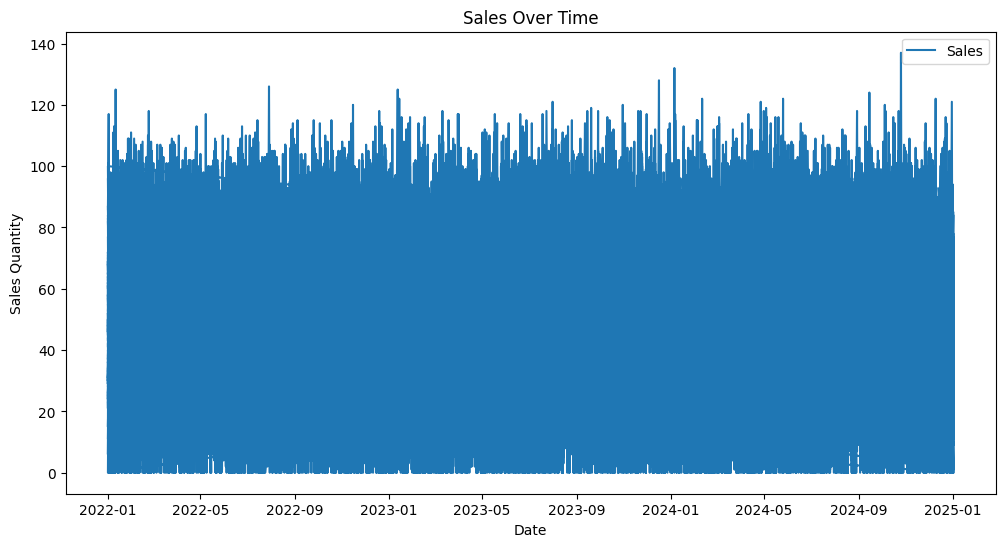

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
sales_data = pd.read_csv("data/sales_data.csv", parse_dates=["date"])

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_data["date"], sales_data["sales_quantity"], label="Sales")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.title("Sales Over Time")
plt.legend()
plt.show()


In [5]:
sales_data = merge_data(sales_data, campaign_data, weather_data, economic_data)

C:\Users\omers\AppData\Local\Temp\ipykernel_23700\1170390969.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data.fillna(method='ffill', inplace=True)


In [6]:
sales_data

,product_id,date,sales_quantity,average_temperature,precipitation,inflation_rate,unemployment_rate,discount_rate,is_campaign
0,1,2022-01-01,65,14.930308,Sunny,16.410246,10.232272,33.0,0
1,1,2022-01-02,69,7.769462,Sunny,16.410246,10.232272,33.0,0
2,1,2022-01-03,40,27.470301,Cloudy,16.410246,10.232272,33.0,0
3,1,2022-01-04,57,9.631890,Cloudy,16.410246,10.232272,33.0,0
4,1,2022-01-05,32,19.755798,Rainy,16.410246,10.232272,33.0,0
...,...,...,...,...,...,...,...,...,...
189949,100,2025-01-01,50,6.486927,Rainy,15.665463,10.358618,33.0,0
189950,100,2025-01-02,42,21.467272,Rainy,15.665463,10.358618,30.0,0
189951,100,2025-01-02,42,21.467272,Rainy,15.665463,10.358618,50.0,0
189952,100,2025-01-02,42,21.467272,Rainy,15.665463,10.358618,10.0,0
